## Phone Price Dataset

Link for the Dataset - https://datapecharcha.substack.com/p/kaggle-datasets-to-practice-eda-on

Step 0: Import Libraries

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Phone_Price.csv')

Step 1: Inspect Raw Data

In [4]:
print("First 3 rows (raw):")
print(df.head(3))

First 3 rows (raw):
   Unnamed: 0                                     name    price  \
0           0                OnePlus Nord CE 2 Lite 5G  ?18,999   
1           1                    Samsung Galaxy A14 5G  ?16,499   
2           2  Samsung Galaxy F23 5G (6GB RAM + 128GB)  ?16,999   

                                       sim  \
0       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                        processor                    memory  \
0    Snapdragon 695, Octa Core, 2.2?GHz Processor  6?GB RAM, 128?GB inbuilt   
1       Exynos 1330, Octa Core, 2.4?GHz Processor   4?GB RAM, 64?GB inbuilt   
2  Snapdragon  750G, Octa Core, 2.2?GHz Processor  6?GB RAM, 128?GB inbuilt   

                                   baterry  \
0  5000?mAh Battery with 33W Fast Charging   
1  5000?mAh Battery with 15W Fast Charging   
2  5000?mAh Battery with 25W Fast Charging   

                        

In [5]:
print("DataFrame info (raw):")
df.info()

DataFrame info (raw):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1020 non-null   int64 
 1   name        1020 non-null   object
 2   price       1020 non-null   object
 3   sim         1020 non-null   object
 4   processor   1020 non-null   object
 5   memory      1020 non-null   object
 6   baterry     1020 non-null   object
 7   display     1020 non-null   object
 8   camara      1020 non-null   object
 9   version     1019 non-null   object
dtypes: int64(1), object(9)
memory usage: 79.8+ KB


In [6]:
print("Missing values (raw):")
print(df.isnull().sum())

Missing values (raw):
Unnamed: 0    0
name          0
price         0
sim           0
processor     0
memory        0
baterry       0
display       0
camara        0
version       1
dtype: int64


Observation:

- First column is Unnamed: 0
- All columns are object (strings)
- Values have ? → hidden data quality issues (We are not using version so we can drop later)

Step 2: Drop Useless Column (Unnamed: 0)

In [7]:
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
    print("Dropped 'Unnamed: 0'")

Dropped 'Unnamed: 0'


In [8]:
print("Columns after drop:")
print(df.columns.tolist())

Columns after drop:
['name', 'price', 'sim', 'processor', 'memory', 'baterry', 'display', 'camara', 'version']


Step 3: Clean price

In [9]:
# Clean price
df['price'] = df['price'].str.replace('?', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(int)

In [10]:
# Verify
print("Sample price:", df['price'].iloc[0])
print("Price dtype:", df['price'].dtype)

Sample price: 18999
Price dtype: int32


In [11]:
df.head(2)

,name,price,sim,processor,memory,baterry,display,camara,version
0,OnePlus Nord CE 2 Lite 5G,18999,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 33W Fast Charging,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",64?MP + 2?MP + 2?MP Triple Rear 16?MP Front C...,Android v12
1,Samsung Galaxy A14 5G,16499,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4?GHz Processor","4?GB RAM, 64?GB inbuilt",5000?mAh Battery with 15W Fast Charging,"6.6 inches, 1080?x?2408?px, 90 Hz Display with...",50?MP + 2?MP + 2?MP Triple Rear 13?MP Front C...,Android v13


Step 4: Clean memory → Extract ram and storage

In [12]:
# Clean ? from memory
df['memory'] = df['memory'].str.replace('?', '', regex=False)

In [13]:
# Extract RAM and Storage
df['ram'] = df['memory'].str.extract(r'(\d+)\s*GB\s*RAM')[0].astype('Int64')
df['storage'] = df['memory'].str.extract(r'(\d+)\s*GB\s*inbuilt')[0].astype('Int64')

In [14]:
# Drop original
df = df.drop('memory', axis=1)

In [15]:
# Verify
print("RAM sample:", df['ram'].iloc[0])
print("Storage sample:", df['storage'].iloc[0])
print("Missing RAM:", df['ram'].isnull().sum())

RAM sample: 6
Storage sample: 128
Missing RAM: 140


In [16]:
df.tail(3)

,name,price,sim,processor,baterry,display,camara,version,ram,storage
1017,MTR M1900,890,Dual Sim,1.4?MHz Processor,3000?mAh Battery,"1.77 inches, 280?x?240?px Display",0.3?MP Rear Camera,Dual Sim,<NA>,<NA>
1018,MTR M2163,749,Dual Sim,256?MHz Processor,1100?mAh Battery,"1.77 inches, 240?x?320?px Display",0.3?MP Rear Camera,No FM Radio,<NA>,<NA>
1019,MTR M7,1050,Dual Sim,"32?MB RAM, 32?MB inbuilt","1.44 inches, 240?x?320?px Display",0.3?MP Rear Camera,"Memory Card Supported, upto 32?GB",NaN,<NA>,<NA>


Step 5: Clean baterry → Extract battery_mah

In [17]:
df['baterry'] = df['baterry'].str.replace('?', '', regex=False)
df['battery_mah'] = df['baterry'].str.extract(r'(\d+)\s*mAh')[0].astype('Int64')
df = df.drop('baterry', axis=1)

In [18]:
print("Battery sample:", df['battery_mah'].iloc[0])

Battery sample: 5000


In [19]:
df.head(2)

,name,price,sim,processor,display,camara,version,ram,storage,battery_mah
0,OnePlus Nord CE 2 Lite 5G,18999,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",64?MP + 2?MP + 2?MP Triple Rear 16?MP Front C...,Android v12,6,128,5000
1,Samsung Galaxy A14 5G,16499,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4?GHz Processor","6.6 inches, 1080?x?2408?px, 90 Hz Display with...",50?MP + 2?MP + 2?MP Triple Rear 13?MP Front C...,Android v13,4,64,5000


Step 6: Clean display → Extract Screen & Resolution

In [20]:
df['display'] = df['display'].str.replace('?', '', regex=False)

In [21]:
df['screen_size_inch'] = df['display'].str.extract(r'([\d\.]+)\s*inches')[0].astype('Float64')

In [22]:
res = df['display'].str.extract(r'(\d+)\s*x\s*(\d+)\s*px')
df['resolution_width'] = pd.to_numeric(res[0], errors='coerce')
df['resolution_height'] = pd.to_numeric(res[1], errors='coerce')

In [23]:
df = df.drop('display', axis=1)

In [24]:
print("Screen size:", df['screen_size_inch'].iloc[0])
print("Resolution:", df[['resolution_width', 'resolution_height']].iloc[0].values)

Screen size: 6.59
Resolution: [1080. 2412.]


In [25]:
df.head(2)

,name,price,sim,processor,camara,version,ram,storage,battery_mah,screen_size_inch,resolution_width,resolution_height
0,OnePlus Nord CE 2 Lite 5G,18999,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor",64?MP + 2?MP + 2?MP Triple Rear 16?MP Front C...,Android v12,6,128,5000,6.59,1080.0,2412.0
1,Samsung Galaxy A14 5G,16499,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4?GHz Processor",50?MP + 2?MP + 2?MP Triple Rear 13?MP Front C...,Android v13,4,64,5000,6.6,1080.0,2408.0


Step 7: Clean camara → Extract Camera MP

In [26]:
df['camara'] = df['camara'].str.replace('?', '', regex=False)

In [27]:
df['rear_camera_mp'] = df['camara'].str.extract(r'^(\d+\.?\d*)\s*MP')[0].astype('Float64')
df['front_camera_mp'] = df['camara'].str.extract(r'(\d+\.?\d*)\s*MP\s*Front')[0].astype('Float64')

In [28]:
# Fill missing camera MP with 0 (e.g., foldable phones)
df['rear_camera_mp'] = df['rear_camera_mp'].fillna(0)
df['front_camera_mp'] = df['front_camera_mp'].fillna(0)

In [29]:
df = df.drop('camara', axis=1)

In [30]:
print("Rear MP:", df['rear_camera_mp'].iloc[0])
print("Front MP:", df['front_camera_mp'].iloc[0])

Rear MP: 64.0
Front MP: 16.0


Step 8: Keeping Only Columns Needed for EDA

In [31]:
cols_needed = [
    'name', 'price', 'ram', 'storage', 'battery_mah',
    'screen_size_inch', 'resolution_width', 'resolution_height',
    'rear_camera_mp', 'front_camera_mp'
]

df_clean = df[cols_needed].copy()

Step 9: Final Data Quality Check

In [32]:
print("Final info:")
df_clean.info()

Final info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1020 non-null   object 
 1   price              1020 non-null   int32  
 2   ram                880 non-null    Int64  
 3   storage            883 non-null    Int64  
 4   battery_mah        942 non-null    Int64  
 5   screen_size_inch   942 non-null    Float64
 6   resolution_width   938 non-null    float64
 7   resolution_height  938 non-null    float64
 8   rear_camera_mp     1020 non-null   Float64
 9   front_camera_mp    1020 non-null   Float64
dtypes: Float64(3), Int64(3), float64(2), int32(1), object(1)
memory usage: 81.8+ KB


In [33]:
print("Final missing values:")
print(df_clean.isnull().sum())

Final missing values:
name                   0
price                  0
ram                  140
storage              137
battery_mah           78
screen_size_inch      78
resolution_width      82
resolution_height     82
rear_camera_mp         0
front_camera_mp        0
dtype: int64


In [34]:
# Drop rows with any missing key values
df_clean = df_clean.dropna().reset_index(drop=True)

In [35]:
print("After dropping missing rows:")
print("Final shape:", df_clean.shape)
print("Final missing values:")
print(df_clean.isnull().sum())

After dropping missing rows:
Final shape: (866, 10)
Final missing values:
name                 0
price                0
ram                  0
storage              0
battery_mah          0
screen_size_inch     0
resolution_width     0
resolution_height    0
rear_camera_mp       0
front_camera_mp      0
dtype: int64


Step 10: Final Sample

In [36]:
print("Final cleaned sample:")
print(df_clean.head()[['name', 'price', 'ram', 'storage', 'battery_mah',
    'screen_size_inch', 'resolution_width', 'resolution_height',
    'rear_camera_mp', 'front_camera_mp']])

Final cleaned sample:
                                      name  price  ram  storage  battery_mah  \
0                OnePlus Nord CE 2 Lite 5G  18999    6      128         5000   
1                    Samsung Galaxy A14 5G  16499    4       64         5000   
2  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    6      128         5000   
3                     Motorola Moto G62 5G  14999    6      128         5000   
4                       Realme 10 Pro Plus  24999    6      128         5000   

   screen_size_inch  resolution_width  resolution_height  rear_camera_mp  \
0              6.59            1080.0             2412.0            64.0   
1               6.6            1080.0             2408.0            50.0   
2               6.6            1080.0             2408.0            50.0   
3              6.55            1080.0             2400.0            50.0   
4               6.7            1080.0             2412.0           108.0   

   front_camera_mp  
0             16.0 

Step 11: Save Cleaned Data

In [37]:
df_clean.to_csv('C:/Users/DELL/Documents/GitHub Projects/EDA-Phone Price/Exploratory-Data-Analysis-Phone-Price-Dataset/Phone_Price_Cleaned.csv', index=False)

#### Exploring Dataset

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset you saved earlier
df_clean = pd.read_csv('Phone_Price_Cleaned.csv')

# Verify it's still clean
print("Clean dataset shape:", df_clean.shape)
print(df_clean.dtypes)

Clean dataset shape: (866, 10)
name                  object
price                  int64
ram                    int64
storage                int64
battery_mah            int64
screen_size_inch     float64
resolution_width     float64
resolution_height    float64
rear_camera_mp       float64
front_camera_mp      float64
dtype: object


In [39]:
# Get top 5 expensive phones
top_5 = df_clean.nlargest(5, 'price')[['name', 'price', 'ram', 'storage', 'rear_camera_mp']]

print("Top 5 Expensive Phones:")
print(top_5[['name', 'price', 'ram']])

Top 5 Expensive Phones:
                                           name   price  ram
471             Apple iPhone 14 Pro Max (512GB)  162999    6
658             Apple iPhone 13 Pro Max (512GB)  159900    6
569  Samsung Galaxy Z Fold 4 (12GB RAM + 512GB)  156999   12
650                 Apple iPhone 14 Pro (512GB)  152999    6
788                 Apple iPhone 13 Pro (512GB)  149900    6


In [40]:
# Find 5 cheapest phones with highest rear MP
cheap_high_mp = df_clean.nsmallest(20, 'price').nlargest(5, 'rear_camera_mp')

print("Cheap Phones with High MP:")
print(cheap_high_mp[['name', 'price', 'rear_camera_mp']])

Cheap Phones with High MP:
             name  price  rear_camera_mp
648        Lyf F1   4299            16.0
692      Voto V2i   3490            13.0
860  Lyf Water 10   3499            13.0
863   Lyf Water 1   3649            13.0
496   Lyf Earth 2   3895            13.0


In [41]:
# Find phones with battery > 6000 mAh and price < ₹20k
big_battery_low_cost = df_clean[(df_clean['battery_mah'] > 6000) & (df_clean['price'] < 20000)]

print("Big Battery, Low Cost:")
print(big_battery_low_cost[['name', 'price', 'battery_mah']])

Big Battery, Low Cost:
                               name  price  battery_mah
149                    Tecno Pova 3   9999         7000
205  Tecno Pova 3 (6GB RAM + 128GB)  13890         7000
476                    Tecno Pova 2  10599         7000


In [42]:
# Find all phones with storage >= 512GB
high_storage = df_clean[df_clean['storage'] >= 512]

print("High Storage Phones:")
print(high_storage[['name', 'price', 'storage', 'ram']])

High Storage Phones:
                                               name   price  storage  ram
206  Samsung Galaxy S22 Ultra 5G (12GB RAM + 512GB)  118999      512   12
339             Sony Xperia 1 IV (12GB RAM + 512GB)   92980      512   12
409                         Apple iPhone 14 (512GB)   96999      512    6
471                 Apple iPhone 14 Pro Max (512GB)  162999      512    6
511                         Apple iPhone 13 (512GB)   91999      512    4
567                    Apple iPhone 14 Plus (512GB)  106999      512    6
569      Samsung Galaxy Z Fold 4 (12GB RAM + 512GB)  156999      512   12
615                        Asus ROG Phone 5s Pro 5G   79999      512   18
650                     Apple iPhone 14 Pro (512GB)  152999      512    6
658                 Apple iPhone 13 Pro Max (512GB)  159900      512    6
714                    Apple iPhone 13 Mini (512GB)   94900      512    4
716   Samsung Galaxy Z Fold 3 5G (12GB RAM + 512GB)  101800      512   12
788              

##### Visualizations

a. Price Distribution

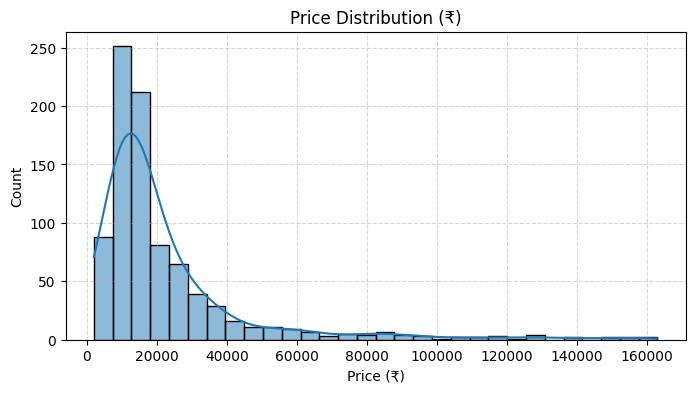

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df_clean['price'], bins=30, kde=True)
plt.title('Price Distribution (₹)')
plt.xlabel('Price (₹)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Observation:

- Highly right-skewed: Most phones are below ₹30,000.
- Long tail: Few flagship phones above ₹70,000 (iPhone, Samsung Ultra).
- Bimodal hint: Peaks around ₹12k (budget) and ₹25k (mid-range).

b. RAM Distribution

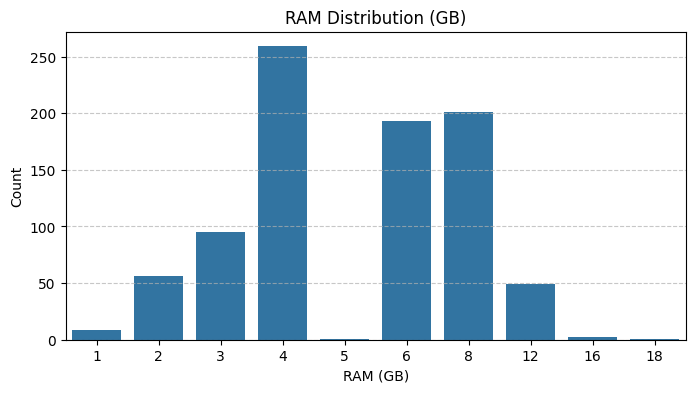

In [44]:
plt.figure(figsize=(8, 4))
sns.countplot(x='ram', data=df_clean, order=sorted(df_clean['ram'].unique()))
plt.title('RAM Distribution (GB)')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation:

- 4GB & 6GB dominate → mid-range norm.
- 8GB+ are less common → premium segment.
- Rare: 16GB.

c. Storage Distribution

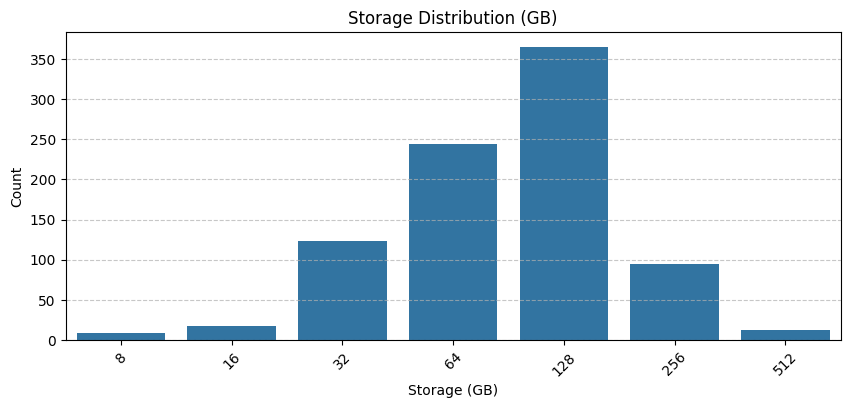

In [45]:
plt.figure(figsize=(10, 4))
sns.countplot(x='storage', data=df_clean, order=sorted(df_clean['storage'].unique()))
plt.title('Storage Distribution (GB)')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observation:

- 128GB is most common → new baseline.
- 64GB fading, 256GB rising in mid-range.
- 512GB+ only in flagships (iPhone, Samsung S22 Ultra).

d. Battery Capacity Distribution

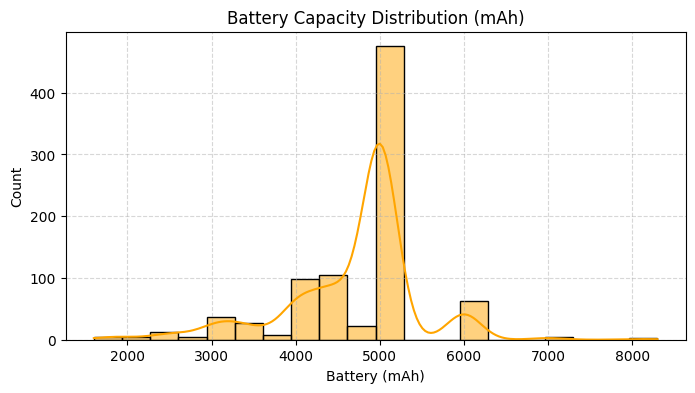

In [46]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['battery_mah'], bins=20, kde=True, color='orange')
plt.title('Battery Capacity Distribution (mAh)')
plt.xlabel('Battery (mAh)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Observation:

- Peak at 5000 mAh → standard for most phones.
- 6000–7000 mAh → budget phones.
- `<`4000 mAh → flagships.

e. Screen Size Distribution

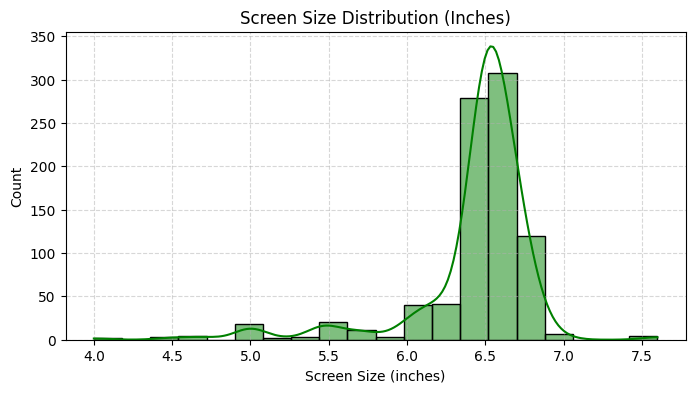

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['screen_size_inch'], bins=20, kde=True, color='green')
plt.title('Screen Size Distribution (Inches)')
plt.xlabel('Screen Size (inches)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Observation:

- Most phones: 6.4" – 6.8" → little variation across price bands.
- `<`6": Older or compact phones.
- `>`6.8": Rare.

f. Rear Camera MP Distribution

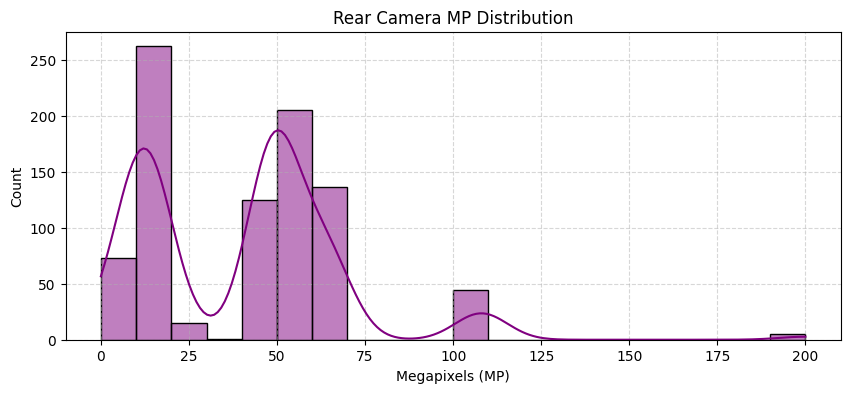

In [48]:
plt.figure(figsize=(10, 4))
sns.histplot(df_clean['rear_camera_mp'], bins=20, kde=True, color='purple')
plt.title('Rear Camera MP Distribution')
plt.xlabel('Megapixels (MP)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

g. Front Camera MP Distribution

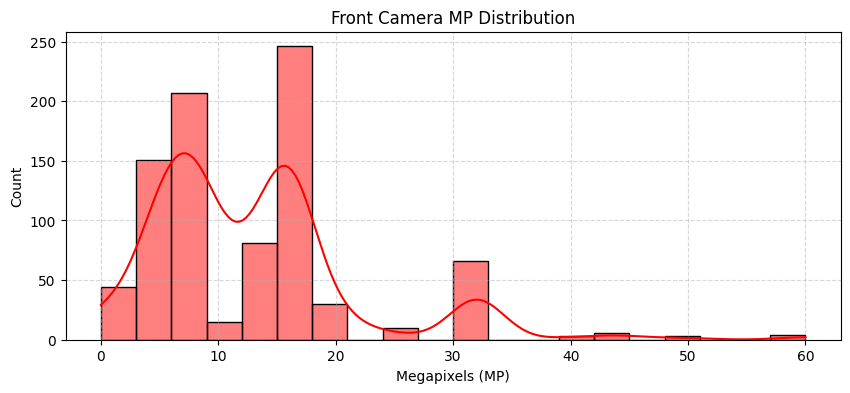

In [49]:
plt.figure(figsize=(10, 4))
sns.histplot(df_clean['front_camera_mp'], bins=20, kde=True, color='red')
plt.title('Front Camera MP Distribution')
plt.xlabel('Megapixels (MP)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

h. Heatmap: Correlation Matrix

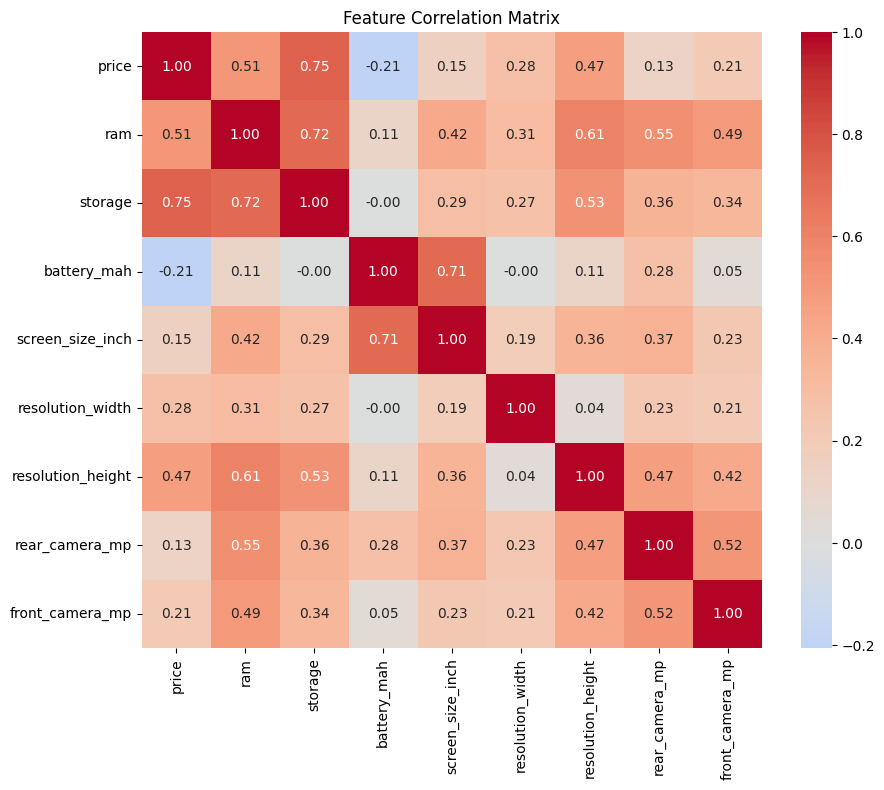

In [50]:
plt.figure(figsize=(10, 8))
corr = df_clean.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

Observation:

- Storage vs Price: +0.75 → strongest driver.
- RAM vs Price: +0.51 → moderate.
- Battery vs Price: –0.21 → inverse trend.
- Camera MP: Very weak correlation (<0.25).

i. Top 10 Most Expensive Phones (Bar Plot)

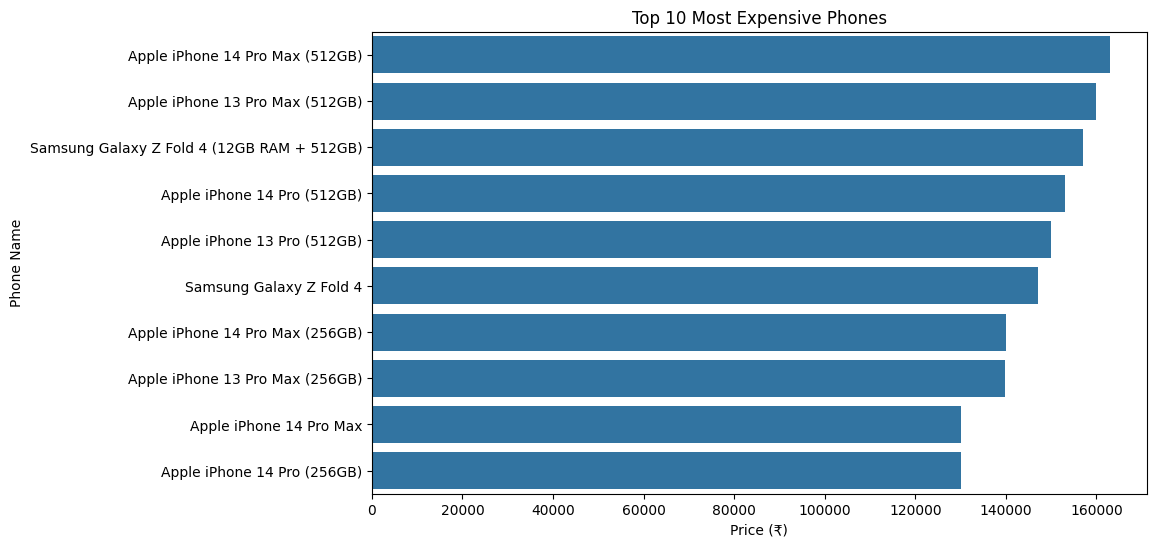

In [51]:
top10 = df_clean.nlargest(10, 'price')

plt.figure(figsize=(10, 6))
sns.barplot(data=top10, x='price', y='name')
plt.title('Top 10 Most Expensive Phones')
plt.xlabel('Price (₹)')
plt.ylabel('Phone Name')
plt.show()

j. Battery vs Price (Scatter with Trend)

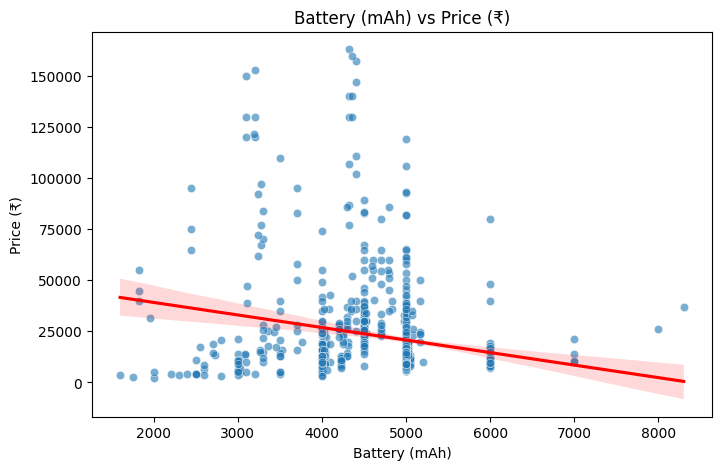

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='battery_mah', y='price', alpha=0.6)
sns.regplot(data=df_clean, x='battery_mah', y='price', scatter=False, color='red')
plt.title('Battery (mAh) vs Price (₹)')
plt.xlabel('Battery (mAh)')
plt.ylabel('Price (₹)')
plt.show()

Observation:

- Negative trend line → higher battery = lower price.

#### Solving Problem Statements

1. How strong is the relationship between the amount of RAM and the phone's price range?

2. Do more megapixels in the primary camera or front camera actually lead to a higher price?

3. Is there a clear trend where phones with a higher battery power command a higher price?

4. Does a larger screen height and width consistently place a phone in a more expensive category?

5. How does the amount of internal memory correlate with price? Is it as influential as RAM?

All 5 EDA Questions (Based on Your Correlation Values)
- Note: All correlations are Pearson (linear). Values:
    - 0.0–0.3: Weak
    - 0.3–0.6: Moderate
    - `>` 0.6: Strong

Question 1:

- How strong is the relationship between the amount of RAM and the phone's price range?

- Analysis Type: Bivariate (RAM vs Price)

Correlation between RAM and Price: 0.51


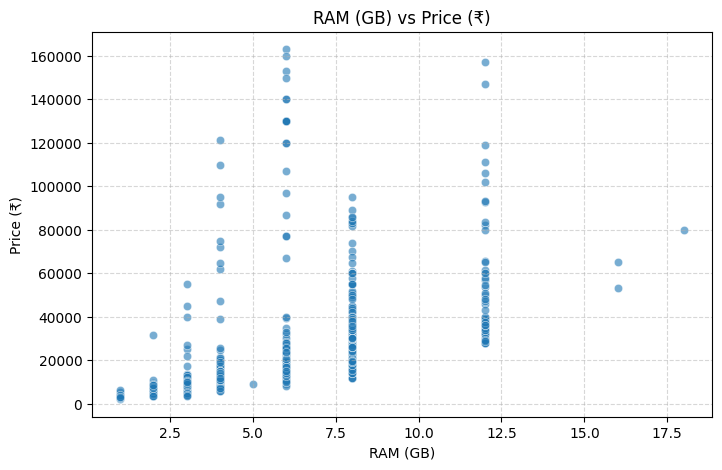

In [53]:
# Calculate correlation
corr_ram_price = df_clean['ram'].corr(df_clean['price'])
print(f"Correlation between RAM and Price: {corr_ram_price:.2f}")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='ram', y='price', alpha=0.6)
plt.title('RAM (GB) vs Price (₹)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (₹)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Correlation: 0.51

Observation:

There is a moderate positive correlation (0.51) between RAM and price.

- Phones with higher RAM (8GB, 12GB, 16GB) tend to be more expensive, but the relationship is not as strong as other factors (like storage).
- Many mid-range phones (₹15k–₹25k) already offer 6–8GB RAM, so RAM alone doesn’t guarantee premium pricing.

Question 2:

- Do more megapixels in the primary camera or front camera actually lead to a higher price?

- Analysis Type: Bivariate (Rear MP vs Price) + (Front MP vs Price)

Rear Camera MP vs Price Correlation: 0.13
Front Camera MP vs Price Correlation: 0.21


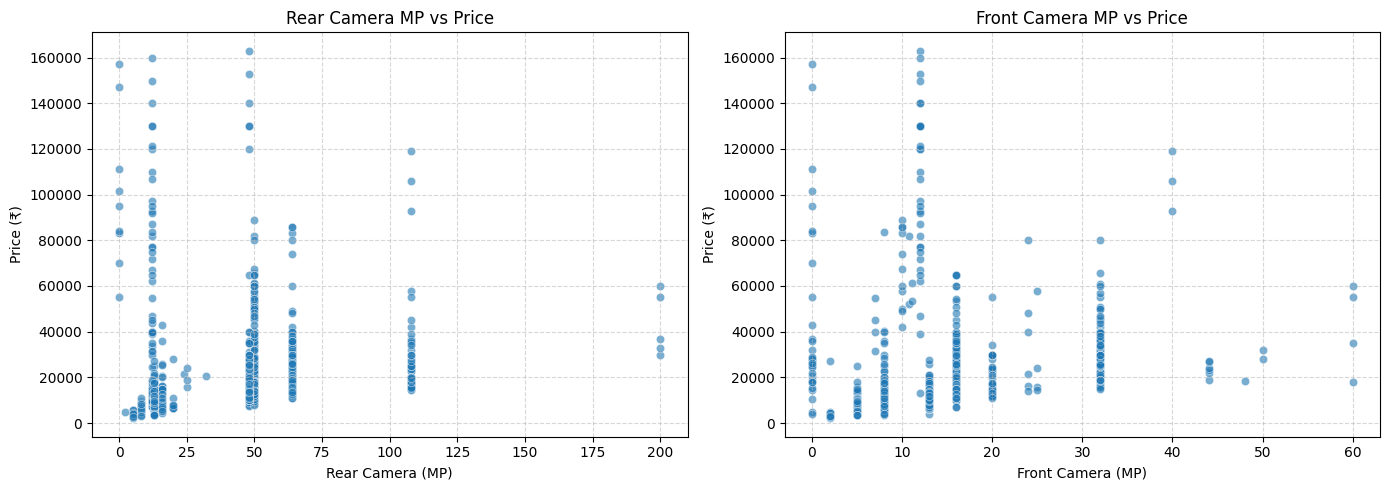

In [54]:
# Correlations
corr_rear = df_clean['rear_camera_mp'].corr(df_clean['price'])
corr_front = df_clean['front_camera_mp'].corr(df_clean['price'])
print(f"Rear Camera MP vs Price Correlation: {corr_rear:.2f}")
print(f"Front Camera MP vs Price Correlation: {corr_front:.2f}")

# Plot both
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Rear camera
sns.scatterplot(data=df_clean, x='rear_camera_mp', y='price', ax=axes[0], alpha=0.6)
axes[0].set_title('Rear Camera MP vs Price')
axes[0].set_xlabel('Rear Camera (MP)')
axes[0].set_ylabel('Price (₹)')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Front camera
sns.scatterplot(data=df_clean, x='front_camera_mp', y='price', ax=axes[1], alpha=0.6)
axes[1].set_title('Front Camera MP vs Price')
axes[1].set_xlabel('Front Camera (MP)')
axes[1].set_ylabel('Price (₹)')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Correlations:

- Rear MP vs Price: 0.13 → very weak
- Front MP vs Price: 0.21 → weak

Observation:

- No. Camera megapixels show very weak to weak correlation with price.

- Megapixels are a marketing spec — not a reliable price driver.

Question 3:

- Is there a clear trend where phones with higher battery power command a higher price?

- Analysis Type: Bivariate (Battery vs Price)

Battery (mAh) vs Price Correlation: -0.21


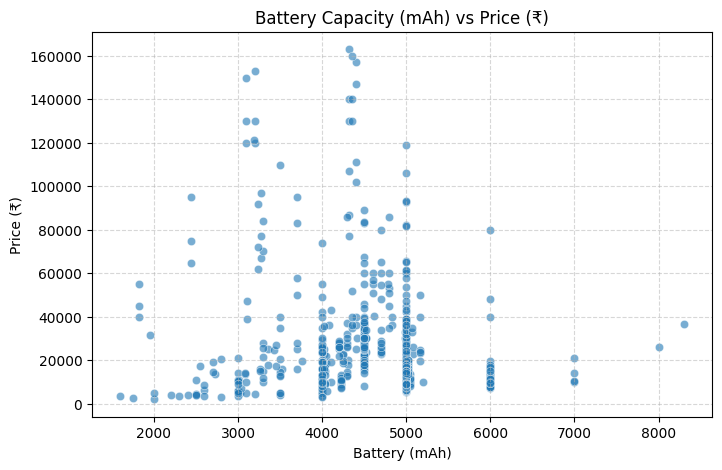

In [55]:
# Correlation
corr_battery = df_clean['battery_mah'].corr(df_clean['price'])
print(f"Battery (mAh) vs Price Correlation: {corr_battery:.2f}")

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='battery_mah', y='price', alpha=0.6)
plt.title('Battery Capacity (mAh) vs Price (₹)')
plt.xlabel('Battery (mAh)')
plt.ylabel('Price (₹)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Correlation: –0.21 (negative!)

Observation:

No — in fact, the opposite is true.

- There is a weak negative correlation (–0.21): higher battery capacity is associated with lower prices.
- Battery size is not a pricing factor — in fact, it’s inversely related.

Question 4:

- Does a larger screen height and width consistently place a phone in a more expensive category?

- Analysis Type: Bivariate (Resolution Width/Height vs Price)

Resolution Width vs Price: 0.28
Resolution Height vs Price: 0.47
Screen Size (inch) vs Price: 0.15


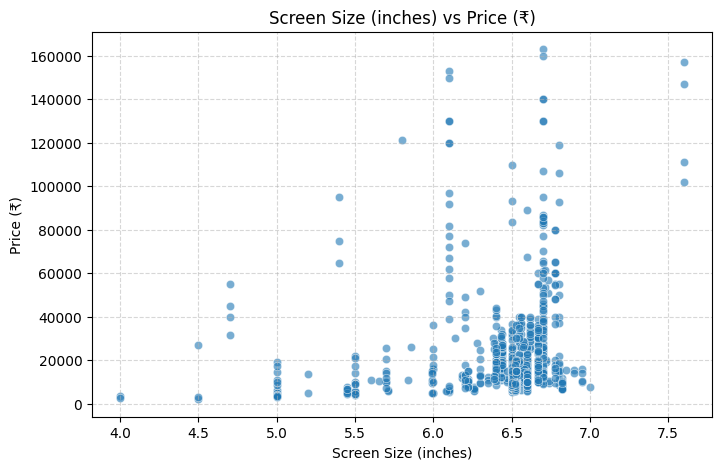

In [56]:
# Correlations
corr_w = df_clean['resolution_width'].corr(df_clean['price'])
corr_h = df_clean['resolution_height'].corr(df_clean['price'])
corr_size = df_clean['screen_size_inch'].corr(df_clean['price'])

print(f"Resolution Width vs Price: {corr_w:.2f}")
print(f"Resolution Height vs Price: {corr_h:.2f}")
print(f"Screen Size (inch) vs Price: {corr_size:.2f}")

# Plot: screen size vs price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean, x='screen_size_inch', y='price', alpha=0.6)
plt.title('Screen Size (inches) vs Price (₹)')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price (₹)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Correlations:

- Screen size (inch): 0.15 → very weak
- Resolution width: 0.28, height: 0.47 → weak to moderate

Observation:

- Screen size (inches) has almost no impact on price (0.15) — most phones are 6.4"–6.8" across all price ranges.

- However, resolution (especially height: 0.47) shows a moderate correlation.

Conclusion:

- Display quality (resolution) matters more than physical size for pricing.

Question 5:

- How does internal memory (storage) correlate with price? Is it as influential as RAM?

- Analysis Type: Bivariate + Comparison (Storage vs RAM)

Storage vs Price Correlation: 0.75
RAM vs Price Correlation: 0.51


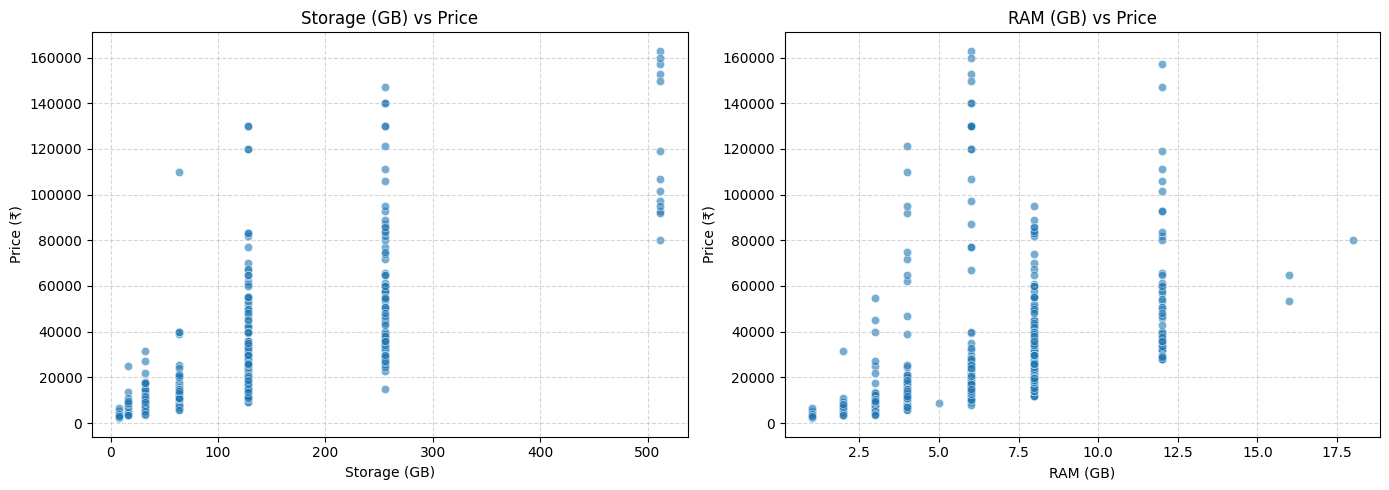

In [57]:
# Correlations
corr_storage = df_clean['storage'].corr(df_clean['price'])
corr_ram = df_clean['ram'].corr(df_clean['price'])

print(f"Storage vs Price Correlation: {corr_storage:.2f}")
print(f"RAM vs Price Correlation: {corr_ram:.2f}")

# Plot both on same figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Storage
sns.scatterplot(data=df_clean, x='storage', y='price', ax=axes[0], alpha=0.6)
axes[0].set_title('Storage (GB) vs Price')
axes[0].set_xlabel('Storage (GB)')
axes[0].set_ylabel('Price (₹)')
axes[0].grid(True, linestyle='--', alpha=0.5)

# RAM
sns.scatterplot(data=df_clean, x='ram', y='price', ax=axes[1], alpha=0.6)
axes[1].set_title('RAM (GB) vs Price')
axes[1].set_xlabel('RAM (GB)')
axes[1].set_ylabel('Price (₹)')
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Correlations:

- Storage vs Price: 0.75 → strong
- RAM vs Price: 0.51 → moderate

Observation:

Yes — storage is a stronger predictor of price than RAM.

- Storage shows a strong positive correlation (0.75):
    - 64GB/128GB → ₹10k–₹25k
    - 256GB/512GB/1TB → ₹50k–₹1.8L (iPhone, Samsung Ultra, Pixel)
- Why? High storage options are mostly offered in premium models.
- Budget phones rarely exceed 256GB, even with expandable storage.

Conclusion:

- Storage has a stronger influence on price than RAM in this dataset.

#### Final Summary

| Feature               | Correlation with Price | Interpretation                                      |
|-----------------------|------------------------|-----------------------------------------------------|
| Storage               | +0.75                  | Strong — major price driver                        |
| Resolution Height     | +0.47                  | Moderate — reflects display quality                 |
| RAM                   | +0.51                  | Moderate — impacts performance tier                 |
| Resolution Width      | +0.28                  | Weak                                               |
| Front Camera MP       | +0.21                  | Very Weak                                          |
| Screen Size (inch)    | +0.15                  | Very Weak                                          |
| Rear Camera MP        | +0.13                  | Very Weak                                          |
| Battery (mAh)         | –0.21                  | Weak negative — higher battery = cheaper phones     |